# Algorithms for Data Mining Workshop: Week 5


This week we will learn something about trees and forests for regression and classification. We will start with regression trees. Please download all files from blackboard before starting the notebook. Also, execute each code cell in the correct order. 

Please read over the whole notebook. It contains several solved exercises and two (2) that you need to add some very simple statements based on the already solved exercises. If something does not run it might mean you need to alter or add a statement :)

# Regression Trees

We start with a rather simple regression task. We have to learn a continous function with a 1-dimensional input.


We first load the training data with the pandas data frames and plot the training points and the 
ground-truth function. The ground-truth values are stored in the test data set in order to evaluate the quality 
of our fit. 

In [1]:
import pandas as pd
import matplotlib.pyplot
import numpy as np

data_train = pd.DataFrame.from_csv('regression_train.csv')
data_test = pd.DataFrame.from_csv('regression_test.csv')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [2]:
x_train = data_train['x'].as_matrix()
y_train = data_train['y'].as_matrix()

x_test = data_test['x'].as_matrix()
y_test = data_test['y'].as_matrix()

x_train = x_train.reshape(-1, 1)

x_test = x_test.reshape(-1, 1)

x_train.shape, y_train.shape

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


((150, 1), (150,))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  if __name__ == '__main__':
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


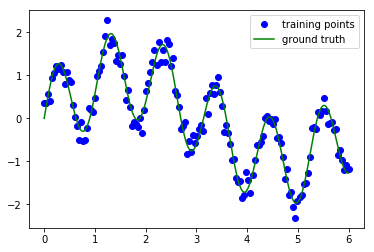

In [3]:
## plot the data
import matplotlib.pyplot as plt

plt.figure()
plt.clf()
plt.plot(x_train,y_train, 'bo')
plt.plot(x_test,y_test, 'g')
plt.legend(('training points', 'ground truth'))
plt.hold(True)
plt.savefig('trainingdata.png')
plt.show()

## Training a Regression Tree

We will use the sklearn package to train our regression trees. sklearn is a generic machine learning library 
that offers a lot of learning algorithms. A regression tree can be generated by:

In [4]:
from sklearn import tree

regTree = tree.DecisionTreeRegressor(min_samples_leaf=1, max_depth=None)

We can set the minimum number of samples per leaf in the tree and the maximum depth of the tree as can be seen above. 
The tree can be trained by:

In [5]:
regTree = regTree.fit(x_train, y_train)

We can use the trained tree for prediction by:

In [6]:
y_predict = regTree.predict(x_test)

## Training the Tree

In this excercise you are supposed to train the tree for our regression task. Train a tree with 
min_samples_leaf set to 1, 5 and 10 and predict the output for *x_test* and plot the predicted
function values. Do you see a difference in the functions? Which value of min_samples_leaf would you use? 

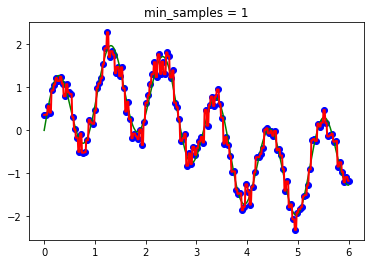

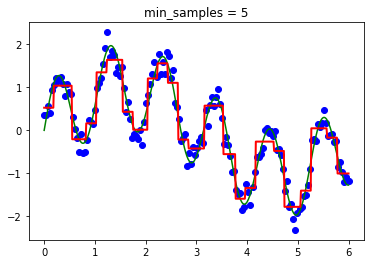

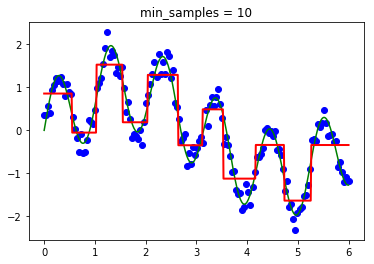

In [7]:
from sklearn import tree

regTree1 = tree.DecisionTreeRegressor(min_samples_leaf=1)
regTree1 = regTree1.fit(x_train, y_train)

y_predict1 = regTree1.predict(x_test)

regTree2 = tree.DecisionTreeRegressor(min_samples_leaf=5)
regTree2 = regTree2.fit(x_train, y_train)
y_predict2 = regTree2.predict(x_test)

regTree3 = tree.DecisionTreeRegressor(min_samples_leaf=10)
regTree3 = regTree3.fit(x_train, y_train)
y_predict3 = regTree3.predict(x_test)


plt.figure()
plt.clf()
plt.plot(x_train,y_train, 'bo')
plt.plot(x_test,y_test, 'g')
plt.plot(x_test,y_predict1, 'r', linewidth=2.0)
plt.title('min_samples = 1')
plt.savefig('regressiontrees1.png')


plt.figure()
plt.clf()
plt.plot(x_train,y_train, 'bo')
plt.plot(x_test,y_test, 'g')
plt.plot(x_test,y_predict2, 'r',linewidth=2.0)
plt.title('min_samples = 5')
plt.savefig('regressiontrees5.png')


plt.figure()
plt.clf()
plt.plot(x_train,y_train, 'bo')
plt.plot(x_test,y_test, 'g')
plt.plot(x_test,y_predict3, 'r',  linewidth=2.0)
plt.title('min_samples = 10')

plt.savefig('regressiontrees10.png')
plt.show()

## Evaluating the trees

We can also use sklearn to evaluate the tree. There are different metrics that we can use. We will use the 
mean squared error criterion to evaluate the trees. We can compute the mse on the train data

In [ ]:
import sklearn.metrics as metrics

mseTrainTree1 = metrics.mean_squared_error(y_train, regTree1.predict(x_train))
mseTrainTree2 = metrics.mean_squared_error(y_train, regTree2.predict(x_train))
mseTrainTree3 = metrics.mean_squared_error(y_train, regTree3.predict(x_train))

mseTrainTree1, mseTrainTree2, mseTrainTree3

And we can compute the mse on the test data

In [ ]:
import sklearn.metrics as metrics

mseTestTree1 = metrics.mean_squared_error(y_test, regTree1.predict(x_test))
mseTestTree2 = metrics.mean_squared_error(y_test, regTree2.predict(x_test))
mseTestTree3 = metrics.mean_squared_error(y_test, regTree3.predict(x_test))

mseTestTree1, mseTestTree2, mseTestTree3

We can see that trees with min_samples = 1 have 0 error on the training set as the training set is learned by heart.
However, the error on the test set is the one that really counts. Here, also min_samples_leaf = 1 performs the best, but 
maybe we can find better settings of min_samples_leaf?

# Decision Trees
In contrast to regression trees, the output for a decision tree is a discrete class label not 
a continuous value. A decision tree can be used for any multi-label classification problem. We will use the 
decision trees on the iris data set, where we will only use the first two features in the training data as input
for illustration purposes. 

In [ ]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split

iris = datasets.load_iris()

X = iris.data[:,:2]
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure()
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.savefig('classification_data.png')
plt.show()

The iris data set contains 3 classes of iris flowers that should be classified according to their sepal width 
and sepal length.  

We split the data set into 67% training data and 33% test data. I.e., we have 100 training and 50 test points. 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape

## Training a Decision Tree

We will again use the sklearn package. A decision tree can be generated by:

In [ ]:
from sklearn import tree

decTree = tree.DecisionTreeClassifier(min_samples_leaf=2, max_depth=None)

We can set the same properties as for a regression tree. Similarly, we can train the tree

In [ ]:
decTree = decTree.fit(X_train, Y_train)

We can use the trained tree for prediction by:

In [ ]:
y_predict = decTree.predict(X_test)

## Plotting the decision boundary
In this excercise we want to train a decision tree for different values of min_samples_leaf. After training the tree,
we will plot the decision boundary of the learned tree with the existing python code. 

Plot the decision boundary for different number of min_samples_leaf. Can you observe a qualitatitve difference 
between the learned classifiers?

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

n_classes = 3
plot_colors = "bry"
plot_step = 0.02

clf = DecisionTreeClassifier(min_samples_leaf=5)

clf = clf.fit(X_train, Y_train)  

# create a grid for the two input dimensions
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

plt.figure()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.Paired)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.axis("tight")
plt.savefig('classification_tree.png')
plt.show()


Which value of min_samples_leaf would you choose?

## Evaluating decision trees
For evaluating the decision tree, we can compute the average number of correctly 
classified samples on the test set. This metric is called  accuracy_score in sklearn. 

In [ ]:
from sklearn import metrics

train_accuracy = metrics.accuracy_score(Y_train, clf.predict(X_train))
test_accuracy = metrics.accuracy_score(Y_test, clf.predict(X_test))

train_accuracy, test_accuracy

## Exercise 1: Finding the best min_samples_leaf value

For the values of min_samples_leaf = [1,2,3,5,7,10, 15, 20, 50], compute the accuracy_score on the train and on 
the test set. Plot both accuracy scores as a function of min_samples_leaf. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

minSamples = [1,2,3,5,7,10, 15, 20, 50]
train_accuracy = np.zeros((len(minSamples),1))
test_accuracy = np.zeros((len(minSamples),1))


for i in range(0,len(minSamples)):
   
    clf = # declare a decisionTreeClassifier taking as input the minSamples
      
    clf.fit(X_train, Y_train)

    train_accuracy[i] = metrics.accuracy_score(Y_train, clf.predict(X_train))
    test_accuracy[i] = metrics.accuracy_score(Y_test, clf.predict(X_test))
    

plt.figure()
plt.plot(minSamples, train_accuracy, 'b')
plt.plot(minSamples, test_accuracy, 'g')
plt.xlabel('min_samples_per_leaf')
plt.ylabel('accuracy')
plt.legend(('training set', 'test set'))
plt.savefig('classification_minSamples.png')
plt.show()


We can again see effects of overfitting and underfitting. For min_samples_leaf < 10, we have a high training accuracy but the test accuracy degrades. Thats overfitting. 
For min_samples_leaf > 20, test and training performance degrades which is a sign of underfitting. 

## Training a Decision Forest

We will again use the sklearn package. A decision forest can be generated by:

In [ ]:
from sklearn import ensemble

decForest = ensemble.RandomForestClassifier(n_estimators=10, min_samples_leaf=2, max_depth=None)

We can set the same properties as for a decision forest (including number of trees by n_estimator). 
Similarly, we can train the forest

In [ ]:
decForest = decForest.fit(X_train, Y_train)

We can use the trained tree for prediction by:

In [ ]:
y_predict = decForest.predict(X_test)

## Exercise 2: Plotting the decision boundary for decision forests
In this excercise we want to train a decision forests for different values of n_estimators. After training the forest, we will plot the decision boundary of the learned forest with the existing python code. 

Plot the decision boundary for different number of min_samples_leaf and use min_samples_leaf = 10. Can you observe a qualitatitve difference between the learned classifiers? Execute your code several times. 
Can you observe a difference between the executions? If yes, why?

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

n_classes = 3
plot_colors = "bry"
plot_step = 0.02

clf = # add your code here to run the random forests classifier with num_estimators=50 and min_samples_leaf=10

clf = # fit the model you have declared above

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

plt.figure()

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.Paired)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.axis("tight")
plt.savefig('classification_forest.png')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

minSamples = [1,3,5,7,10, 15, 20, 30]

numTrials = 10
train_accuracy_single = np.zeros((len(minSamples),numTrials))
test_accuracy_single = np.zeros((len(minSamples),numTrials))

train_accuracy_mean = np.zeros((len(minSamples),1))
test_accuracy_mean = np.zeros((len(minSamples),1))

train_accuracy_std = np.zeros((len(minSamples),1))
test_accuracy_std = np.zeros((len(minSamples),1))


for i in range(0,len(minSamples)):
    clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=minSamples[i])

    for j in range(0, numTrials):
        clf.fit(X_train, Y_train)

        train_accuracy_single[i,j] = metrics.accuracy_score(Y_train, clf.predict(X_train))
        test_accuracy_single[i, j] = metrics.accuracy_score(Y_test, clf.predict(X_test))

    train_accuracy_mean[i] = np.mean(train_accuracy_single[i,:])
    train_accuracy_std[i] = np.std(train_accuracy_single[i,:])
    
    test_accuracy_mean[i] = np.mean(test_accuracy_single[i,:])
    test_accuracy_std[i] = np.std(test_accuracy_single[i,:])
    
        
plt.figure()
plt.errorbar(minSamples, train_accuracy_mean, yerr = train_accuracy_std)
plt.errorbar(minSamples, test_accuracy_mean, yerr = test_accuracy_std)
plt.savefig('classification_forest_minsamples.png')
plt.show()

## Finding the best n_estimator value

Test the algorithm for a different number of trees, i.e., [1,5,10,20,40,60,100]. Repeat each experiment 10 times and average over the performance values due to the randomness. Evaluate the average accuracy on the training and aon the test set for the given number of trees (n_estimators). 
Use min_samples_leaf = 15.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

numTrees  = [1,5,10,20,40,60,100]

numTrials = 10
train_accuracy_single = np.zeros((len(numTrees),numTrials))
test_accuracy_single = np.zeros((len(numTrees),numTrials))

train_accuracy_mean = np.zeros((len(numTrees),1))
test_accuracy_mean = np.zeros((len(numTrees),1))

train_accuracy_std = np.zeros((len(numTrees),1))
test_accuracy_std = np.zeros((len(numTrees),1))

for i in range(0,len(numTrees)):
    clf = RandomForestClassifier(n_estimators=numTrees[i], min_samples_leaf=15)
    
    for j in range(0, numTrials):
        clf.fit(X_train, Y_train)

        train_accuracy_single[i,j] = metrics.accuracy_score(Y_train, clf.predict(X_train))
        test_accuracy_single[i, j] = metrics.accuracy_score(Y_test, clf.predict(X_test))

    train_accuracy_mean[i] = np.mean(train_accuracy_single[i,:])
    train_accuracy_std[i] = np.std(train_accuracy_single[i,:])
    
    test_accuracy_mean[i] = np.mean(test_accuracy_single[i,:])
    test_accuracy_std[i] = np.std(test_accuracy_single[i,:])
    
        
plt.figure()
plt.plot(numTrees, train_accuracy_mean)
plt.plot(numTrees, test_accuracy_mean)

plt.savefig('classification_forest_numtrees.png')
plt.show()